<a href="https://colab.research.google.com/github/Yaman-Shadid/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales


- Author: Yaman M Shadid

## Project Overview

The project aims to analyze and predict sales patterns for a diverse range of products. The dataset used in this project contains information about various products, such as item attributes, historical sales data, promotional activities, and other relevant features. Leveraging advanced machine learning algorithms, the project seeks to uncover valuable insights and create accurate sales forecasts. By understanding the factors influencing product sales, businesses can make informed decisions regarding inventory management, marketing strategies, and revenue optimization, ultimately enhancing their overall performance and competitiveness in the market.

## Load and Inspect Data

**Data** **Dictionary**

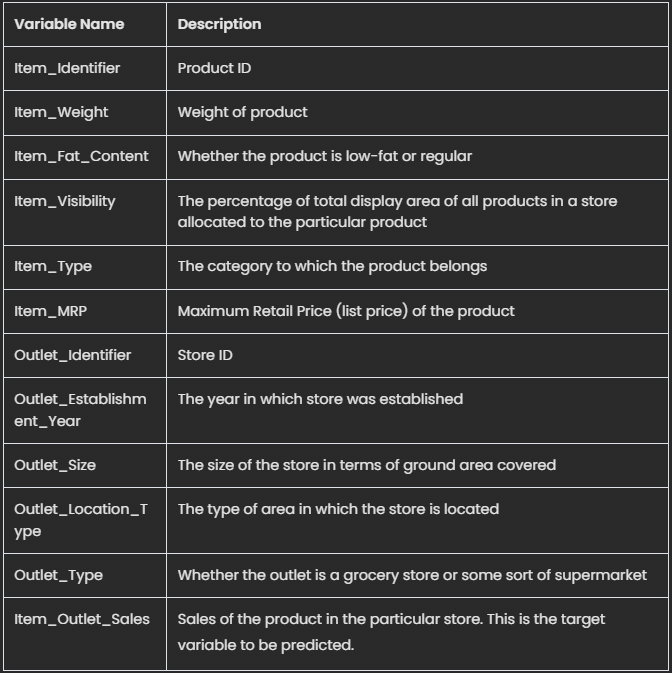

#### **Imports**

In [279]:
# Import required packages
import pandas as pd
import numpy as np
# import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

# Define the file path
file_path = r"E:\Git Hub\Repository\Prediction-of-Product-Sales\Data\sales_predictions_2023.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [280]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Clean Data

**Data Cleaning**

In [282]:
df.shape

(8523, 12)

###### **There are `8523` rows and `12` columns**

**DataTypes**

In [283]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

**Duplicates**

In [284]:
# Checking for duplicates
duplicates = df.duplicated()

In [285]:
# Counting the number of duplicates
num_duplicates = duplicates.sum()
print("Number of duplicates:", num_duplicates)

Number of duplicates: 0


In [286]:
# Dropping duplicates
df.drop_duplicates(inplace=True)

In [287]:
# Verifying if duplicates are dropped
print("Duplicates dropped:", df.duplicated().sum())

Duplicates dropped: 0


### Missing Values
Checking for missing values:

In [288]:
# Checking for missing values
missing_values = df.isnull().sum()

In [289]:
# Displaying the count of missing values for each column
print(missing_values)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


Identifying % of missing data

In [290]:
df.isna().sum() / len(df) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

- Missing Values:
  - There are `1463` missing values in the `Item Weight` column. (17.17%)
  - There are `2410` missing values in the `Outlet Size` column. (28.28%)

Fixing `Outlet_Size`

- Filling in the `Outlet_Size` column with the word `Unknown`.

In [291]:
df['Outlet_Size'] = df['Outlet_Size'].fillna(value = 'Unknown')

In [292]:
df['Outlet_Size'].value_counts()

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

- Checking to make sure the values for the `Outlet_Size` column were filled in.

In [293]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Fixing `Item_Weight`

In [294]:
# Filling missing values with a placeholder
df_filled = df.fillna('-1')

# Displaying the DataFrame with filled values
print(df_filled)

     Item_Identifier Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15         9.3          Low Fat         0.016047   
1              DRC01        5.92          Regular         0.019278   
2              FDN15        17.5          Low Fat         0.016760   
3              FDX07        19.2          Regular         0.000000   
4              NCD19        8.93          Low Fat         0.000000   
...              ...         ...              ...              ...   
8518           FDF22       6.865          Low Fat         0.056783   
8519           FDS36        8.38          Regular         0.046982   
8520           NCJ29        10.6          Low Fat         0.035186   
8521           FDN46        7.21          Regular         0.145221   
8522           DRG01        14.8          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692    

- Checking to make sure the values for the `salary_in_usd` column were filled in.

In [295]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [296]:
# Checking for missing values after filling
missing_values_after_fill = df_filled.isnull().sum()

# Displaying the count of missing values for each column
print(missing_values_after_fill)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


Categorical Columns

In [297]:
# Identify columns with categorical data
categorical_columns = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

In [298]:
# Check unique values in categorical columns
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}:")
    print(unique_values)
    print()

Unique values in Item_Identifier:
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']

Unique values in Item_Fat_Content:
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']

Unique values in Item_Type:
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

Unique values in Outlet_Identifier:
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']

Unique values in Outlet_Size:
['Medium' 'Unknown' 'High' 'Small']

Unique values in Outlet_Location_Type:
['Tier 1' 'Tier 3' 'Tier 2']

Unique values in Outlet_Type:
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']



- Fixing inconsistent categories
- Found that `Item_Fat_Content` needs fixing

In [299]:
# Standardize the values in the column
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'low fat':"Low Fat", 'LF':'Low Fat','reg':'Regular'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

**Numerical Columns**

In [300]:
# Selecting numerical columns
numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']

# Calculate and display summary statistics
for column in numerical_columns:
    column_data = df[column]
    column_min = column_data.min()
    column_max = column_data.max()
    column_mean = column_data.mean()
    print(f"Summary statistics for {column}:")
    print(f"Minimum: {column_min}")
    print(f"Maximum: {column_max}")
    print(f"Mean: {column_mean}")
    print()

Summary statistics for Item_Weight:
Minimum: 4.555
Maximum: 21.35
Mean: 12.857645184135976

Summary statistics for Item_Visibility:
Minimum: 0.0
Maximum: 0.328390948
Mean: 0.06613202877895108

Summary statistics for Item_MRP:
Minimum: 31.29
Maximum: 266.8884
Mean: 140.9927819781767

Summary statistics for Outlet_Establishment_Year:
Minimum: 1985
Maximum: 2009
Mean: 1997.8318667135984

Summary statistics for Item_Outlet_Sales:
Minimum: 33.29
Maximum: 13086.9648
Mean: 2181.288913575032



Summary

In [301]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Data Analysis

In [302]:
# Checking info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


In [303]:
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [304]:
df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [305]:
# Get correlations
corr = df.corr(numeric_only = True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.01,0.03,-0.01,0.01
Item_Visibility,-0.01,1.00,-0.00,-0.07,-0.13
Item_MRP,0.03,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,-0.01,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,1.00


Text(0.5, 1.0, 'Item Weight Histogram')

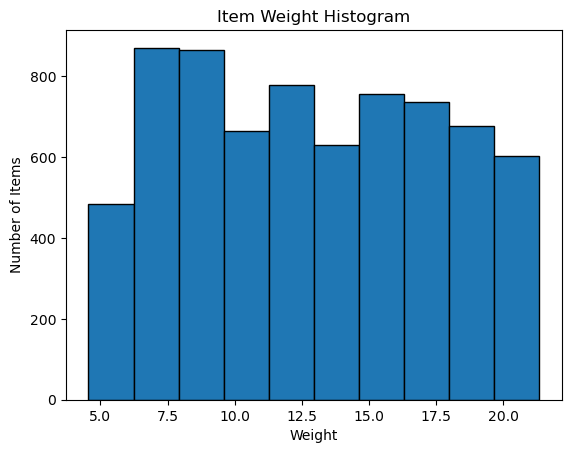

In [306]:
# Create a histogram of the 'Item_Weight' column
plt.hist(df['Item_Weight'], bins=10, edgecolor='black')

# Set labels and title
plt.xlabel('Weight')
plt.ylabel('Number of Items')
plt.title('Item Weight Histogram')

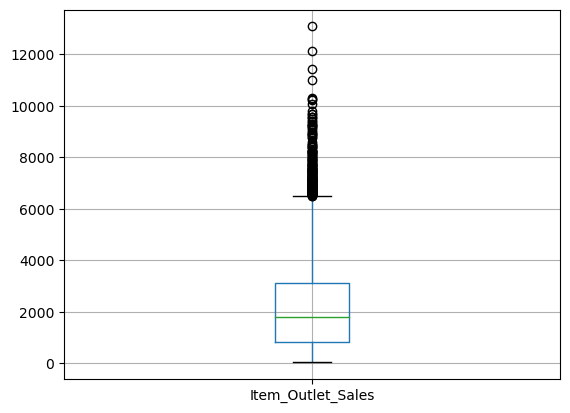

In [307]:
# Boxplot
ax = df.boxplot(column='Item_Outlet_Sales')
plt.show()

In [308]:
# Using select dtypes to get names of categorical columns
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [309]:
# Saving the value counts
val_counts_Fat_Content = df['Item_Fat_Content'].value_counts()
val_counts_Fat_Content

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

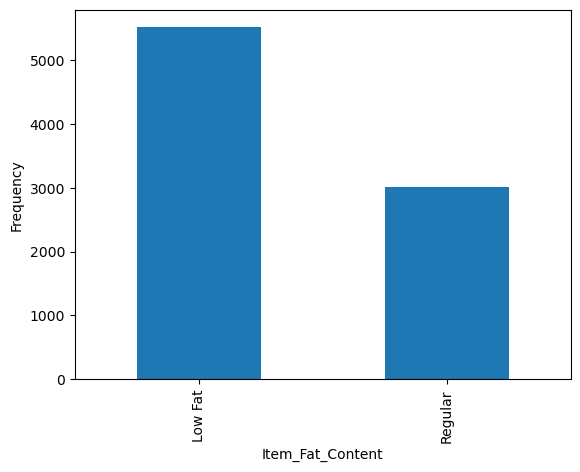

In [310]:
# Plot value counts as a bar graph
ax = val_counts_Fat_Content.plot(kind='bar')
ax.set_ylabel("Frequency");
ax.set_xlabel("Item_Fat_Content");

C:\Users\verya\AppData\Local\Temp\ipykernel_14180\4148026349.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


Text(0.5, 1.0, 'Correlation Heatmap')

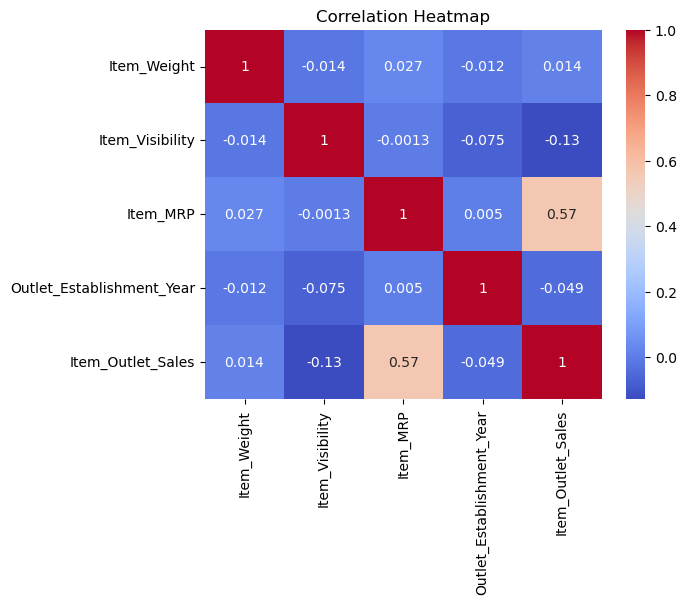

In [311]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

## Feature Inspection

### Setup

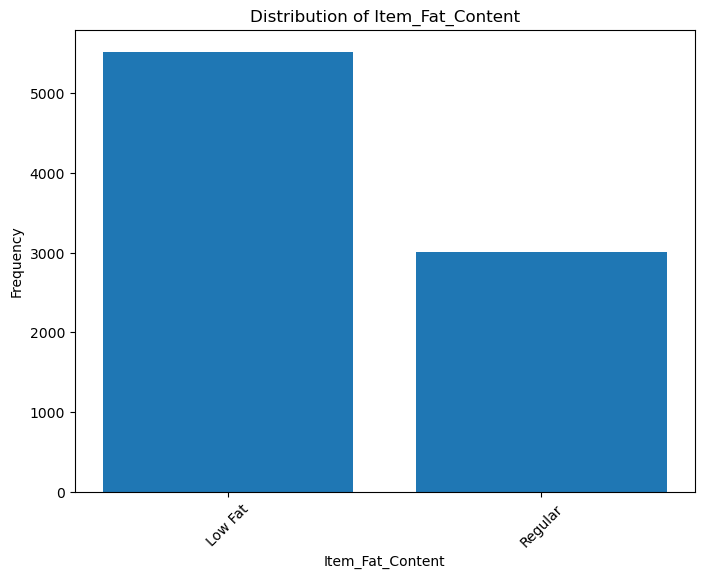

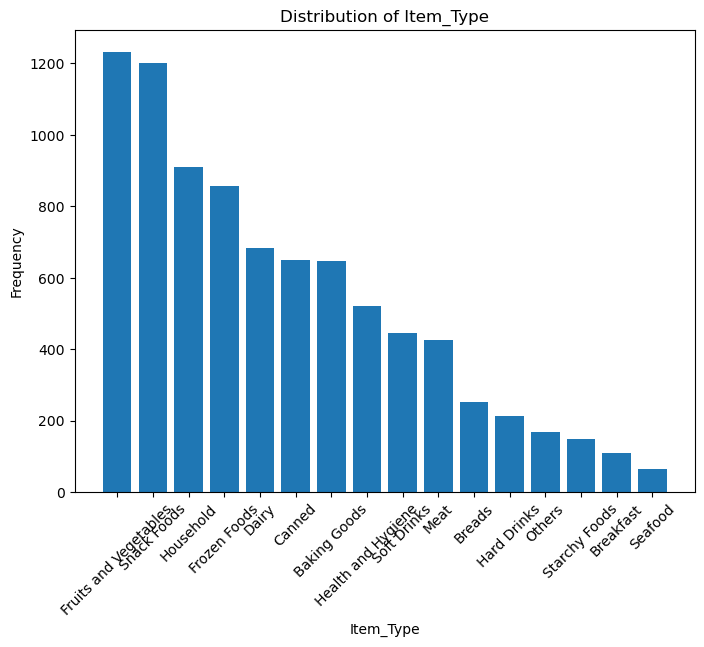

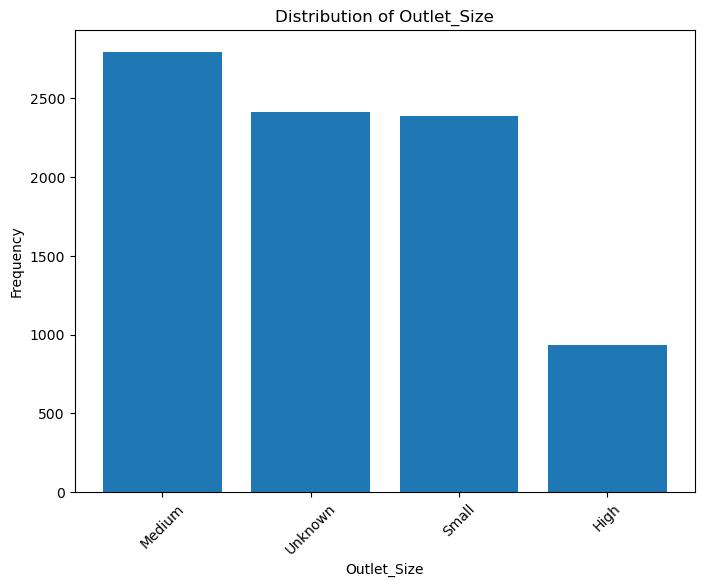

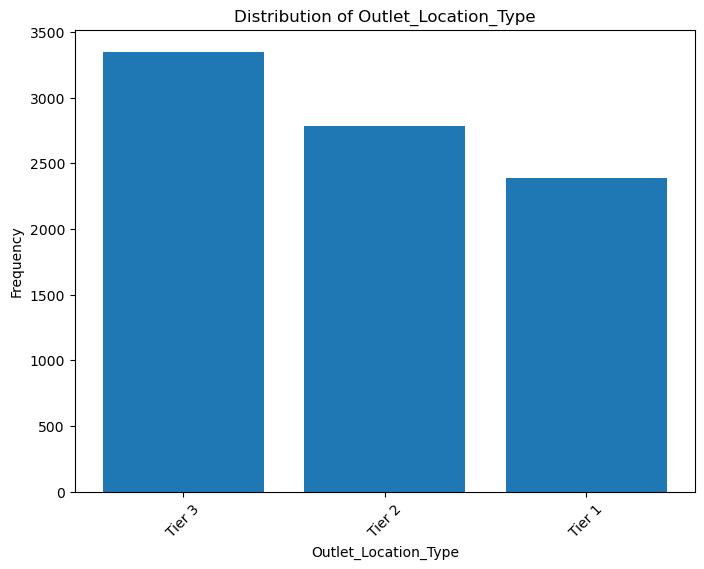

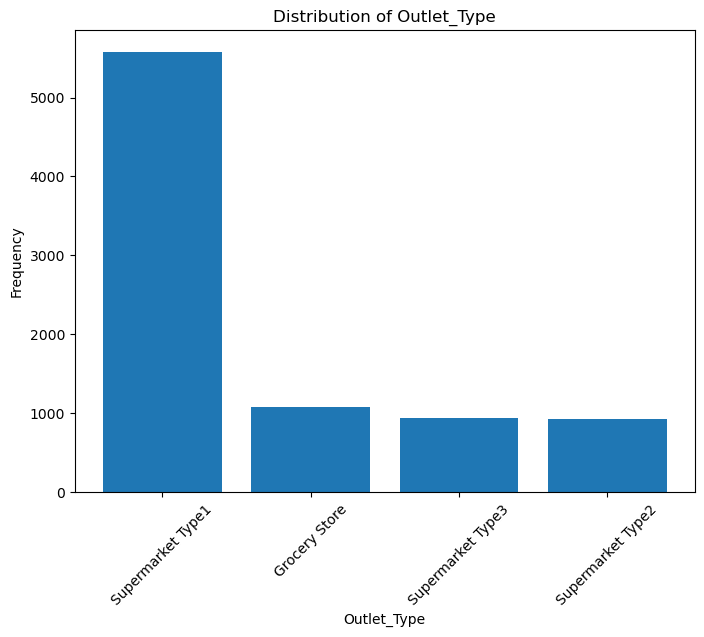

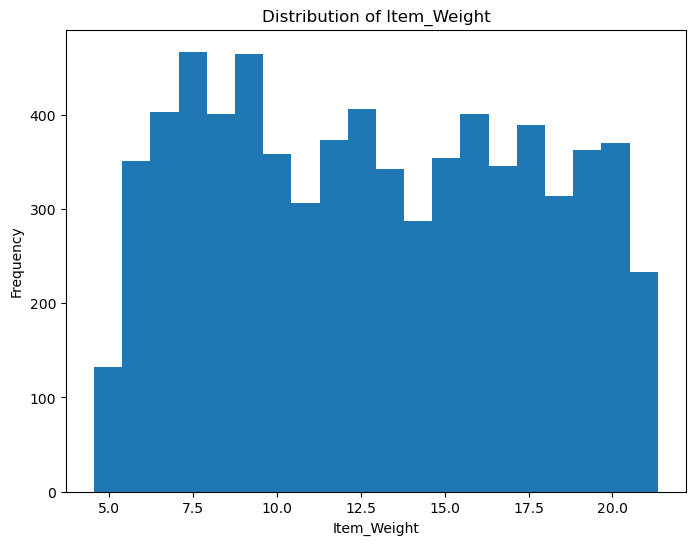

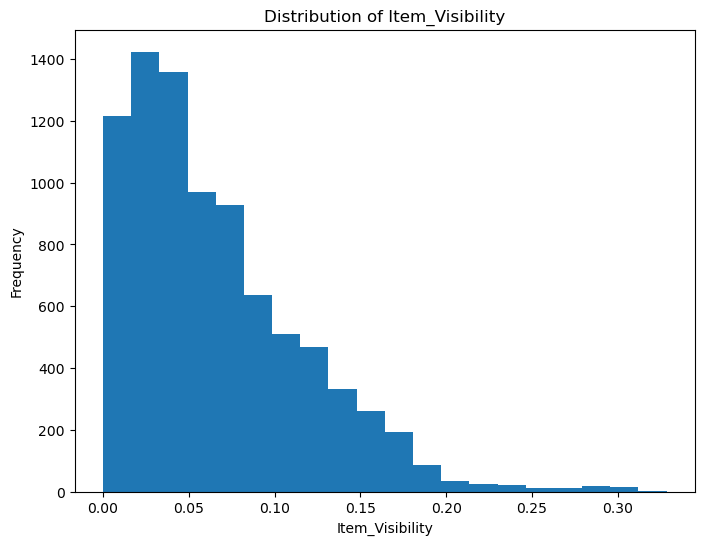

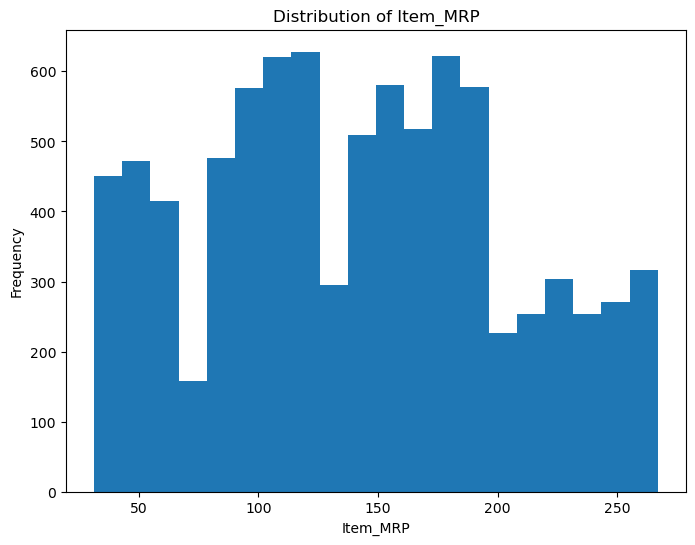

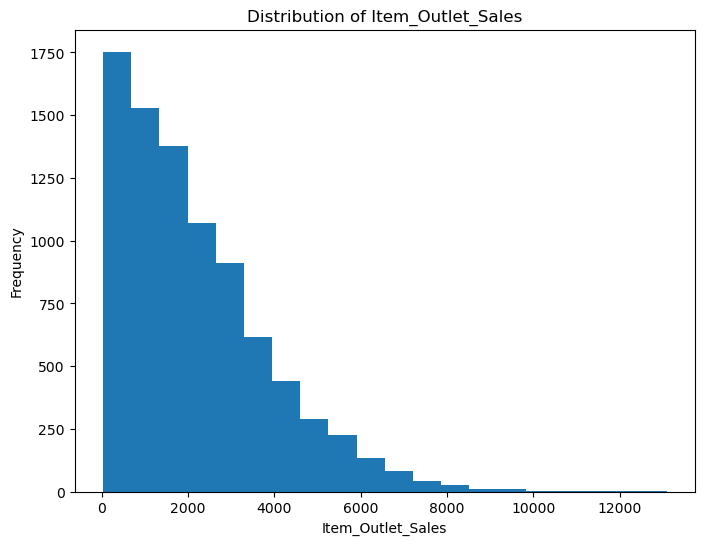

In [312]:
# Function to create bar charts for categorical variables
def plot_categorical(feature):
    value_counts = df[feature].value_counts()
    plt.figure(figsize=(8, 6))
    plt.bar(value_counts.index, value_counts.values)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.show()

# Function to create histograms for numeric variables
def plot_numeric(feature):
    plt.figure(figsize=(8, 6))
    plt.hist(df[feature], bins=20)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature}')
    plt.show()

# Univariate visualizations for the specified features
plot_categorical('Item_Fat_Content')
plot_categorical('Item_Type')
plot_categorical('Outlet_Size')
plot_categorical('Outlet_Location_Type')
plot_categorical('Outlet_Type')

plot_numeric('Item_Weight')
plot_numeric('Item_Visibility')
plot_numeric('Item_MRP')
plot_numeric('Item_Outlet_Sales')

### Categorical

In [313]:
def explore_categorical(df, x, fillna=True, placeholder = 'MISSING'):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=(6,4))
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}")
  fig.tight_layout()

#### Item Fat Content
Whether the product is Low Fat or Regular

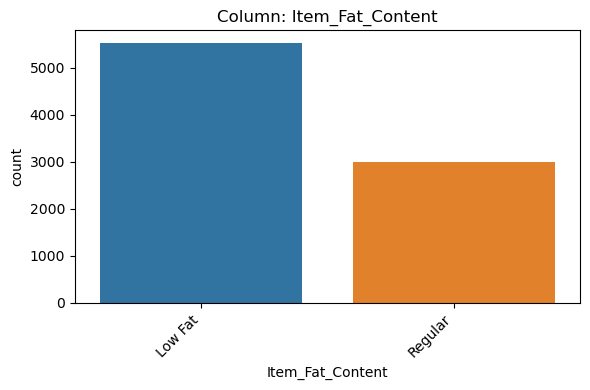

In [314]:
# Test our function on
explore_categorical(df, 'Item_Fat_Content');

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - `Categorical`
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - `0`
- Is the feature constant or quasi-constant?
  - `quasi-constant`
- What is the cardinality? Is it high (>10)?
  - `low`
- Would we know this feature before the target is determined?
  - `Yes`
- Is there a business case/understanding reason to exclude based on our business case?
  - `No`

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - `Yes`
- Does this feature appear to be a predictor of the target?
  - `Yes`

#### Item Type
Category to which the product belongs

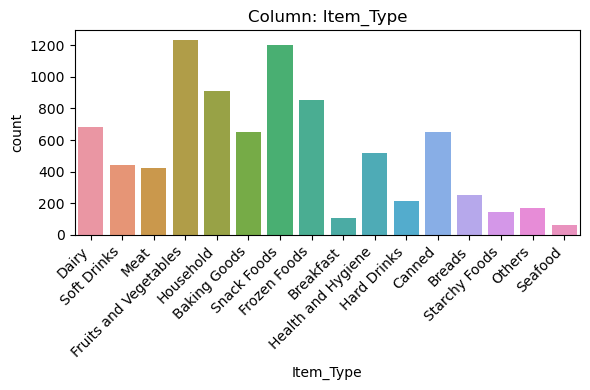

In [315]:
# Test our function on
explore_categorical(df, 'Item_Type');

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - `Categorical`
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - `0`
- Is the feature constant or quasi-constant?
  - `quasi-constant`
- What is the cardinality? Is it high (>10)?
  - `High`
- Would we know this feature before the target is determined?
  - `Yes`
- Is there a business case/understanding reason to exclude based on our business case?
  - `No`

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - `Yes`
- Does this feature appear to be a predictor of the target?
  - `Yes`

#### Outlet Size
The size of the store in terms of ground area covered

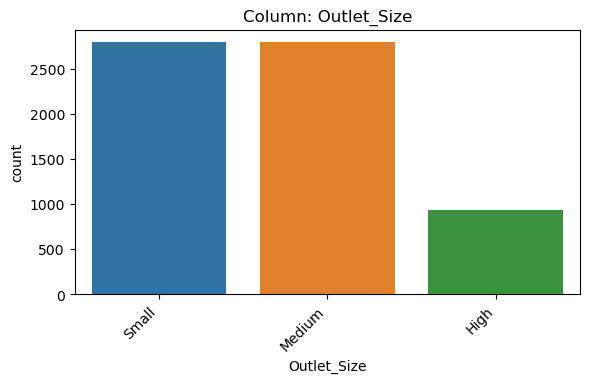

In [316]:
# Test our function on
explore_categorical(df, 'Outlet_Size');
# Saving a list of the possible categories in order
O_S_Order = ['Small', 'Medium', 'High',]
# Using the order argument in our countplot
sns.countplot(data=df, x='Outlet_Size', order=O_S_Order);

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - `ordinal`
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - `2410`
  - `Drop rows`
- Is the feature constant or quasi-constant?
  - `quasi-constant`
- What is the cardinality? Is it high (>10)?
  - `low`
- Would we know this feature before the target is determined?
  - `Yes`
- Is there a business case/understanding reason to exclude based on our business case?
  - `No`

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - `Yes`
- Does this feature appear to be a predictor of the target?
  - `Yes`

#### Outlet Location Type
The type of area in which the store is located

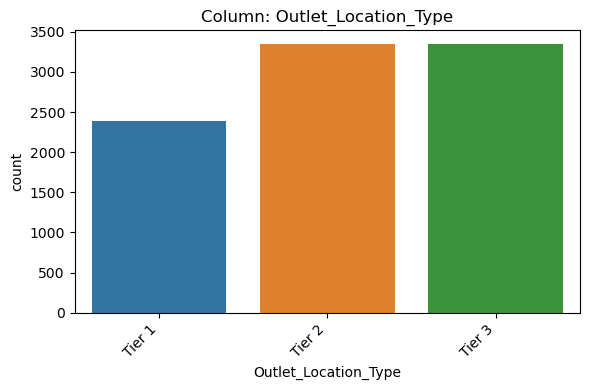

In [317]:
# Test our function on
explore_categorical(df, 'Outlet_Location_Type');
# Saving a list of the possible categories in order
O_L_T_Order = ['Tier 1','Tier 2','Tier 3']
# Using the order argument in our countplot
sns.countplot(data=df, x='Outlet_Location_Type', order=O_L_T_Order);

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - `Categorical`
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - `0`
- Is the feature constant or quasi-constant?
  - `quasi-constant`
- What is the cardinality? Is it high (>10)?
  - `low`
- Would we know this feature before the target is determined?
  - `Yes`
- Is there a business case/understanding reason to exclude based on our business case?
  - `No`

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - `Yes`
- Does this feature appear to be a predictor of the target?
  - `Yes`

#### Outlet Type
Whether the outlet is a grocery store or some sort of supermarket

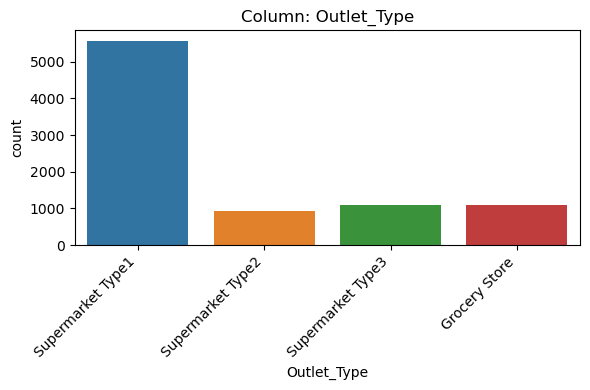

In [318]:
# Test our function on Alley
explore_categorical(df, 'Outlet_Type');
# Saving a list of the possible categories in order
O_T_Order = ['Supermarket Type1','Supermarket Type2','Supermarket Type3', 'Grocery Store']
# Using the order argument in our countplot
sns.countplot(data=df, x='Outlet_Type', order=O_T_Order);

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - `Categorical`
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - `0`
- Is the feature constant or quasi-constant?
  - `quasi-constant`
- What is the cardinality? Is it high (>10)?
  - `low`
- Would we know this feature before the target is determined?
  - `Yes`
- Is there a business case/understanding reason to exclude based on our business case?
  - `No`

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - `Yes`
- Does this feature appear to be a predictor of the target?
  - `Yes`

### Numerical



In [319]:
def plot_numeric_vs_target(df, x, y='Item_MRP', figsize=(6,4)):
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]
  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)
  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})")
  # Make sure the plot is shown before the print statement
  plt.show()
  return fig, ax

In [320]:
# Add **kwargs as keyword when defining function
# Include **kwargs in the sns.regplot() within the function

def plot_numeric_vs_target(df, x, y='Item_MRP', figsize=(6,4), **kwargs): # kwargs for sns.regplot
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]
  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws, **kwargs) # Included the new argument within the sns.regplot function
  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})")
  # Make sure the plot is shown before the print statement
  plt.show()
  return fig, ax

#### Item Weight
Weight of Product

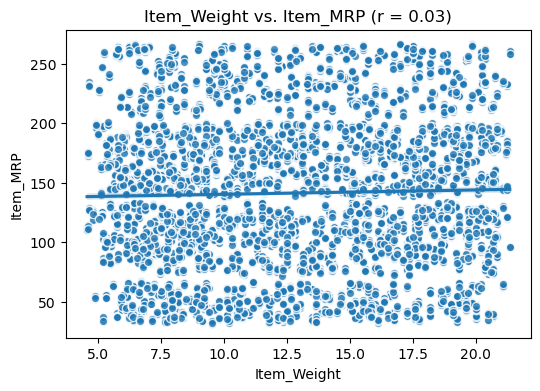

In [321]:
# Test the function with two kwargs from the regplot function
fig, ax = plot_numeric_vs_target(df, "Item_Weight",)

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - `numeric`
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - `1463 Missing values`
  - `I would drop the row`
- Is the feature constant or quasi-constant?
  - `quasi-constant`
- What is the cardinality? Is it high (>10)?
  - `high`
- Would we know this feature before the target is determined?
  - `Yes`
- Is there a business case/understanding reason to exclude based on our business case?
  - `No`

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - `Yes`
- Does this feature appear to be a predictor of the target?
  - `Yes`

#### Item Visibility
The % of total display area of all products in a store allocated to the particular product

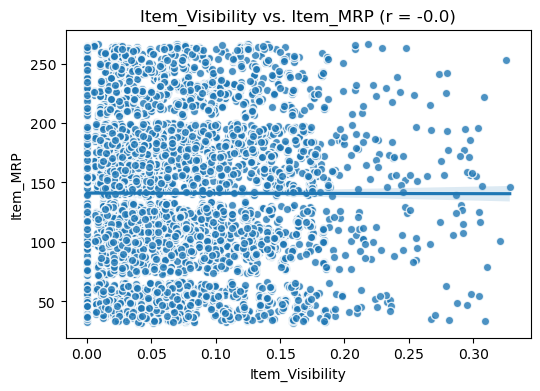

In [322]:
# Test the function with two kwargs from the regplot function
fig, ax = plot_numeric_vs_target(df, "Item_Visibility",)

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - `numeric`
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - `0`
- Is the feature constant or quasi-constant?
  - `quasi-constant`
- What is the cardinality? Is it high (>10)?
  - `High`
- Would we know this feature before the target is determined?
  - `Yes`
- Is there a business case/understanding reason to exclude based on our business case?
  - `No`

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - `Yes`
- Does this feature appear to be a predictor of the target?
  - `Yes`

#### Item MRP
Max Retail Price (list price) of the product

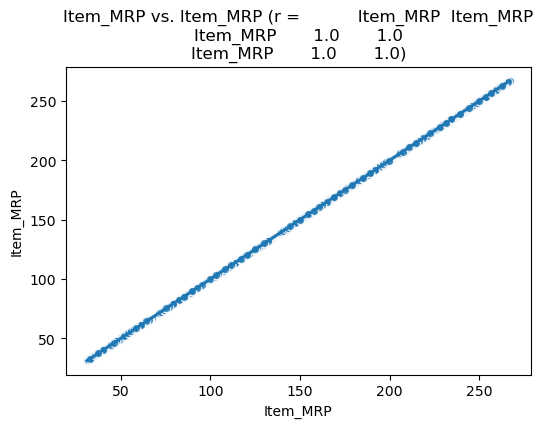

In [323]:
# Test the function with two kwargs from the regplot function
fig, ax = plot_numeric_vs_target(df, "Item_MRP",)

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - `Numeric`
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - `0`
- Is the feature constant or quasi-constant?
  - `quasi-constant`
- What is the cardinality? Is it high (>10)?
  - `High`
- Would we know this feature before the target is determined?
  - `Yes`
- Is there a business case/understanding reason to exclude based on our business case?
  - `No`

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - `Yes`
- Does this feature appear to be a predictor of the target?
  - `Yes`

#### Item Outlet Sales
Sales of the product in the particular store. This is a target variable to be predicted

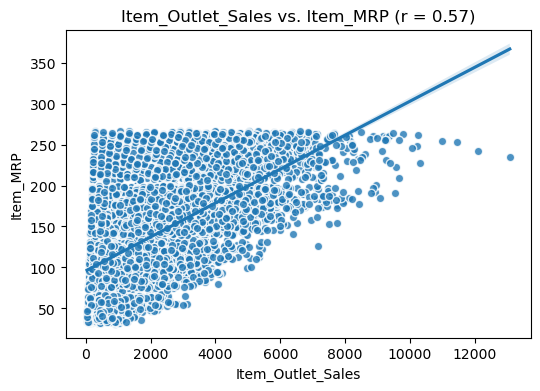

In [324]:
# Test the function with two kwargs from the regplot function
fig, ax = plot_numeric_vs_target(df, "Item_Outlet_Sales",)

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - `numeric`
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - `0`
- Is the feature constant or quasi-constant?
  - `Quasi-constant`
- What is the cardinality? Is it high (>10)?
  - `High`
- Would we know this feature before the target is determined?
  - `Yes`
- Is there a business case/understanding reason to exclude based on our business case?
  - `No`

- Based on your business understanding, would you expect this feature to be a predictor of the target?
  - `Yes`
- Does this feature appear to be a predictor of the target?
  - `Yes`

## Machine Learning

Done in another [Colab Notebook](https://colab.research.google.com/drive/1DOYAgIP95iA6bgNha4egD99hOe8PTH-s?usp=sharing)

# Revisted Portion

In [325]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import set_config
set_config(transform_output='pandas')

In [326]:
pip install missingno


Note: you may need to restart the kernel to use updated packages.


In [327]:
# Imports

# Pandas
import pandas as pd
pd.set_option('display.max_columns',100)

# Numpy
import numpy as np
import missingno

# MatPlotLib
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

# Models
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

import seaborn as sns

# Regression Metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.dummy import DummyRegressor

# Set the default transformation output to Pandas
from sklearn import set_config

from IPython.core.display import clear_output

C:\Users\verya\AppData\Local\Temp\ipykernel_14180\717840941.py:41: DeprecationWarning: Importing clear_output from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import clear_output


In [328]:
def evaluate_regression(model, X_train,y_train, X_test, y_test,for_slides=True): 
    """Evaluates a scikit learn regression model using r-squared and RMSE
    FOR SLIDES VERS DOES MULTIPLE PRINT STATEMENTS FOR VERTICAL DISPLAY OF INFO"""
    
    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
    

    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    mae_test = metrics.mean_absolute_error(y_test, y_pred_test)
    
    if for_slides:
        df_version =[['Split','R^2','MAE','RMSE']]
        df_version.append(['Train',r2_train, mae_train, rmse_train])
        df_version.append(['Test',r2_test, mae_test, rmse_test])
        df_results = pd.DataFrame(df_version[1:], columns=df_version[0])
        df_results = df_results.round(2)
        display(df_results.style.hide(axis='index').format(precision=2, thousands=','))
        
    else: 
        print(f"Training Data:\tR^2 = {r2_train:,.2f}\tRMSE = {rmse_train:,.2f}\tMAE = {mae_train:,.2f}")
        print(f"Test Data:\tR^2 = {r2_test:,.2f}\tRMSE = {rmse_test:,.2f}\tMAE = {mae_test:,.2f}")

In [329]:
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
   # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

In [330]:
def explore_numeric(df, x, figsize=(6,5) ):


  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes

In [331]:
def plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax

In [332]:
def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales',
                           figsize=(6,4)):
    # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

In [333]:
## Define a variable to identify the feature
## Display the features datatype
feature = 'Item_Outlet_Sales'
df[feature].dtype

dtype('float64')

## Extra EDA portion before starting

In [334]:
# Checking for Duplicates
df.duplicated().sum()

0

In [335]:
# Drop rows with missing values in 'Item_Weight'column
df.dropna(subset=['Item_Weight',], inplace=True)

In [336]:
# Drop rows with missing values
df.dropna(inplace=True)

In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7060 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            7060 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           7060 non-null   object 
 3   Item_Visibility            7060 non-null   float64
 4   Item_Type                  7060 non-null   object 
 5   Item_MRP                   7060 non-null   float64
 6   Outlet_Identifier          7060 non-null   object 
 7   Outlet_Establishment_Year  7060 non-null   int64  
 8   Outlet_Size                7060 non-null   object 
 9   Outlet_Location_Type       7060 non-null   object 
 10  Outlet_Type                7060 non-null   object 
 11  Item_Outlet_Sales          7060 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 717.0+ KB


In [338]:
# Checking missing values
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [339]:
# Dropping missing values in Item_Outlet_Sales column
# Must drop these values that are missing since this
# column is our target
df = df.dropna(subset = ['Item_Outlet_Sales'], how = 'all')

In [340]:
df['Item_Outlet_Sales'] = df['Item_Outlet_Sales'].astype(float)

In [341]:
bad_cols = ['Item_Identifier', 'Outlet_Identifier']
df = df.drop(columns=bad_cols)
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Unknown,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [342]:
# split X and y, we are predicting Item_Outlet_Sales
target = 'Item_Outlet_Sales'
X = df.drop(columns=[target])
y = df[target]

# split training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1548,9.600,Low Fat,0.011211,Household,166.9184,1998,Unknown,Tier 3,Grocery Store
512,5.695,Low Fat,0.065857,Frozen Foods,258.5646,2009,Medium,Tier 3,Supermarket Type2
330,20.700,Low Fat,0.092613,Dairy,76.3670,1987,High,Tier 3,Supermarket Type1
5307,19.750,Low Fat,0.012438,Fruits and Vegetables,189.9872,1987,High,Tier 3,Supermarket Type1
794,17.600,Regular,0.016060,Breads,47.2402,2002,Unknown,Tier 2,Supermarket Type1


In [343]:
# list of number column names
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)

# Transformers
mean_imputer = SimpleImputer(strategy='mean')

# Pipeline
num_pipeline = make_pipeline(mean_imputer)
num_pipeline

Numeric Columns: Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')


Pipeline(steps=[('simpleimputer', SimpleImputer())])

In [344]:
# Tuple
numeric_tuple = ('numeric',num_pipeline, num_cols)
numeric_tuple

('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer())]),
 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
        'Outlet_Establishment_Year'],
       dtype='object'))

In [345]:
# Categorical columns

cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [346]:
# Save list of number column names
ordinal_cols = ['Outlet_Size', 'Outlet_Location_Type']

# Ordered Category Lists
Outlet_Size_list = ['Small', 'Medium', 'High']
Outlet_Location_Type_list = ['Tier 1', 'Tier 2', 'Tier 3']

# Transformers

ord = OrdinalEncoder(categories=[Outlet_Size_list,Outlet_Location_Type_list])
freq_imputer = SimpleImputer(strategy='most_frequent')


# Pipeline
ord_pipeline = make_pipeline(freq_imputer, ord)

# Tuple
ord_tuple = ('ordinal',ord_pipeline, ordinal_cols)
ord_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['Small', 'Medium', 'High'],
                                            ['Tier 1', 'Tier 2', 'Tier 3']]))])

In [361]:
# Filter out rows with 'Unknown' in X_train
X_train = X_train[~(X_train == 'Unknown').any(axis=1)]
y_train = y_train[X_train.index]

In [362]:
# list of nominal column names
nominal_cols = X_train.select_dtypes('object').drop(columns=ordinal_cols).columns


In [363]:
# Transformers
missing_imputer = SimpleImputer(strategy='constant', fill_value='missing')
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')  # Ensure handle_unknown is set to 'ignore'


In [364]:
# Pipeline
nom_pipeline = make_pipeline(missing_imputer, ohe)


In [365]:
# Tuple
ohe_tuple = ('categorical', nom_pipeline, nominal_cols)


In [367]:
# Instantiate the make column transformer
preprocessor = ColumnTransformer([numeric_tuple, ord_tuple, ohe_tuple],
                                  remainder='drop', verbose_feature_names_out=False)

preprocessor.fit(X_train)

c:\Users\verya\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'High'],
                                                                             ['T...
                                                                              '1',
                                                                              'Tier '
                                                                              '2',
                                                                              'Tier '
                                                                              '3']]))]),
                                 ['Outlet_Size', 'Outlet_Location_Type']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Type'], dtype='object'))],
                  verbose_feature_names_out=False)

In [368]:
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                          columns=preprocessor.get_feature_names_out(),
                          index=X_train.index)

In [372]:
# Filter out rows with 'Unknown' from X_test
X_test = X_test[~(X_test == 'Unknown').any(axis=1)]
y_test = y_test[X_test.index]  # Adjust if needed, assuming y_test is a pandas Series or DataFrame.

# The transformation should work now
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                         columns=preprocessor.get_feature_names_out(),
                         index=X_test.index)

display(X_test_df)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2
7019,8.600,0.000000,131.5310,1999.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
660,20.700,0.048750,37.5506,2004.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3063,9.300,0.028517,194.6136,2004.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5329,9.170,0.102979,144.9470,1997.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7797,12.500,0.006765,41.7112,1997.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6533,12.600,0.064111,122.3414,1997.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6403,8.270,0.089480,148.6708,1987.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1210,15.350,0.035204,122.8730,1999.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8126,7.435,0.122735,205.2638,1987.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [374]:
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [376]:
# Create an instance of the model
lin_reg = LinearRegression()
# Create a model pipeline
lin_reg.fit(X_train_df,y_train)
evaluate_regression(lin_reg, X_train_df, y_train,
                   X_test_df, y_test)

Split,R^2,MAE,RMSE
Train,0.47,802.76,"1,083.24"
Test,0.48,801.52,"1,105.42"


In [377]:
def get_coefficients(lin_reg):
    coeffs = pd.Series(lin_reg.coef_, index= lin_reg.feature_names_in_)
    coeffs.loc['intercept'] = lin_reg.intercept_
    return coeffs

In [378]:
pd.set_option('display.float_format',lambda x: f"{x:,.4f}")
pd.set_option('display.max_rows', None)

In [379]:
coeffs = get_coefficients(lin_reg)
coeffs.sort_values()

intercept                         -38,632.2989
Outlet_Type_Supermarket Type2        -337.4282
Item_Visibility                      -150.4436
Item_Type_Dairy                      -133.6035
Item_Type_Soft Drinks                -125.7882
Item_Type_Hard Drinks                 -85.5998
Item_Type_Frozen Foods                -75.3743
Item_Type_Fruits and Vegetables       -62.1252
Item_Type_Household                   -58.8701
Item_Type_Baking Goods                -29.5655
Item_Type_Canned                      -18.1058
Item_Type_Meat                        -16.4772
Item_Type_Others                      -14.7091
Item_Weight                            -7.0896
Item_Fat_Content_Regular               -4.1814
Item_Fat_Content_Low Fat                4.1814
Item_Type_Health and Hygiene            5.4032
Item_MRP                               16.2150
Outlet_Establishment_Year              19.2279
Outlet_Size                            22.4826
Item_Type_Snack Foods                  29.2446
Item_Type_Bre

In [380]:
lin_reg_drop = LinearRegression(fit_intercept=False)
lin_reg_drop.fit(X_train_df,y_train)
evaluate_regression(lin_reg_drop, X_train_df, y_train, 
                    X_test_df, y_test)

Split,R^2,MAE,RMSE
Train,0.47,802.76,"1,083.24"
Test,0.48,801.52,"1,105.42"


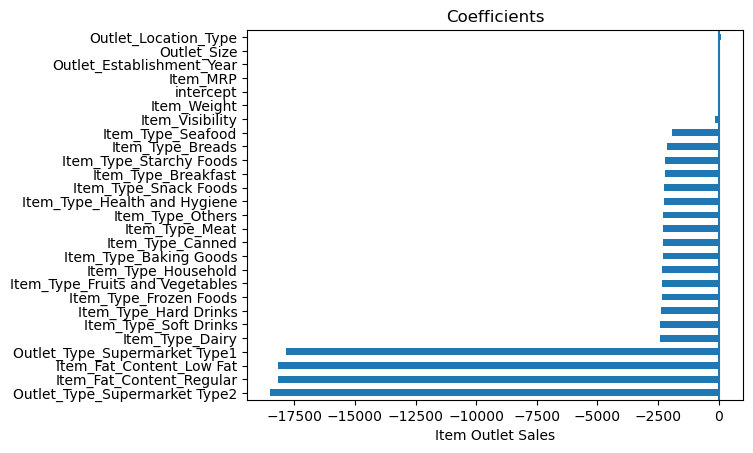

In [381]:
coeffs_dropped = get_coefficients(lin_reg_drop)


ax = coeffs_dropped.sort_values().plot(kind='barh')#, figsize=(8,26))
ax.axvline(0)
ax.set(xlabel='Item Outlet Sales', title="Coefficients");

## Linear Regression

R^2 Score: 0.4771441786533567


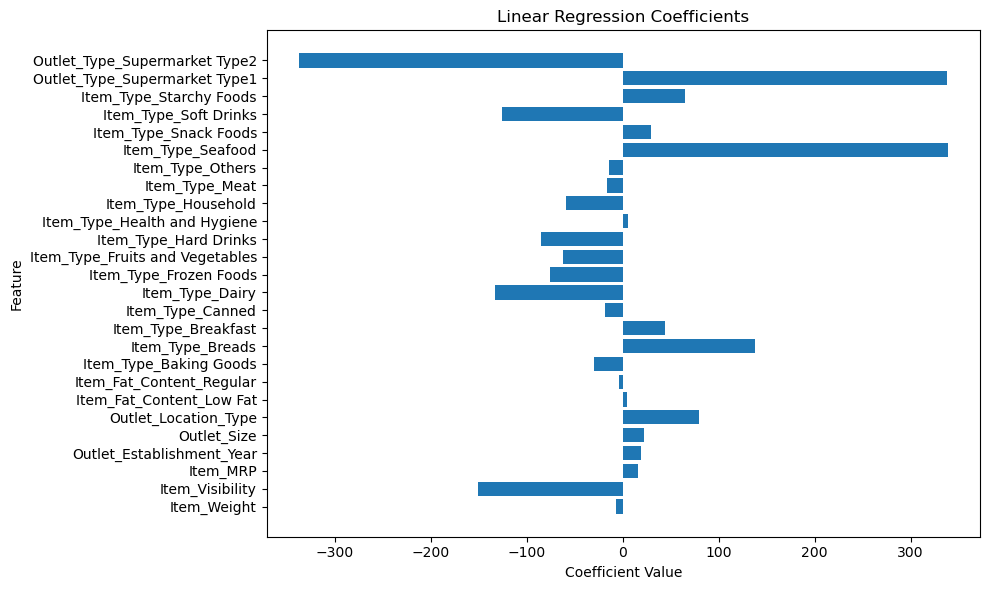

The coefficient for Item_Type_Seafood is 338.50410352198315.
The coefficient for Outlet_Type_Supermarket Type1 is 337.4281823954659.
The coefficient for Item_Type_Breads is 138.01083822609095.


In [383]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Fit the model
lr = LinearRegression()
lr.fit(X_train_df, y_train)

# Score the model
score = lr.score(X_test_df, y_test)
print(f"R^2 Score: {score}")

# Visualize the coefficients
coefficients = lr.coef_
plt.figure(figsize=(10, 6))
plt.barh(X_train_df.columns, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Linear Regression Coefficients')
plt.tight_layout()
plt.savefig("E:\Git Hub\Repository\Prediction-of-Product-Sales\lr_coefficients.png")
plt.show()

# Interpret top 3 features
top_features = X_train_df.columns[coefficients.argsort()[-3:][::-1]]
for feature in top_features:
    coeff_value = coefficients[X_train_df.columns.get_loc(feature)]
    print(f"The coefficient for {feature} is {coeff_value}.")


For a product being in "Supermarket Type2", the sales would increase by 3.32e+16 units compared to a product not being in this supermarket type, keeping all other factors constant.

For a product being sold in "OUT035", the sales would increase by 2.25e+16 units compared to a product not being sold in this outlet, keeping all other factors constant.

For a product being sold in "OUT017", the sales would increase by 2.14e+16 units compared to a product not being sold in this outlet, keeping all other factors constant.

## Tree-Based Model

R^2 Score: 0.40745128483741966


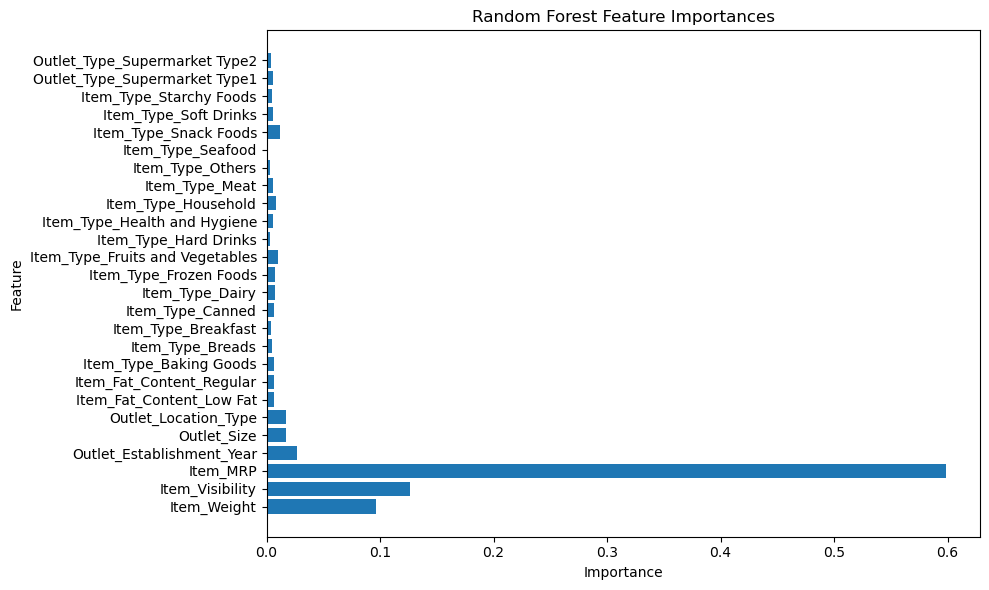

Top 5 features are: Item_MRP, Item_Visibility, Item_Weight, Outlet_Establishment_Year, Outlet_Location_Type


In [385]:
from sklearn.ensemble import RandomForestRegressor

# Fit the model
rf = RandomForestRegressor()
rf.fit(X_train_df, y_train)

# Score the model
score = rf.score(X_test_df, y_test)
print(f"R^2 Score: {score}")

# Visualize the feature importances
importances = rf.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X_train_df.columns, importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances')
plt.tight_layout()
plt.savefig(r"E:\Git Hub\Repository\Prediction-of-Product-Sales\rf_importances.png")
plt.show()

# Interpret top 5 features
top_features = X_train_df.columns[importances.argsort()[-5:][::-1]]
print(f"Top 5 features are: {', '.join(top_features)}")


## Serialize with Joblib

In [390]:
import joblib, os

# creating a dictionary of all of the variables to save for later
export = {'X_train':X_train,
         'y_train':y_train,
         'X_test':X_test,
         'y_test':y_test,
          'preprocessor':preprocessor,
         'LinearRegression': lin_reg,
          'RandomForestRegressor':rf}
folder = "E:\Git Hub\Repository\Prediction-of-Product-Sales\Data/"
filename='prediction_sales.joblib'
os.makedirs(folder, exist_ok=True)

joblib.dump(export, folder + filename)

fname = folder+'best-models.joblib'
joblib.dump(export, fname)

saved_stuff = joblib.load(folder + filename)
saved_stuff.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'LinearRegression', 'RandomForestRegressor'])